## Importing the necessary Libraries:

In [1]:
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 50)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud, ImageColorGenerator
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the data:

In [4]:
df = pd.read_csv("sample30.csv")

## Exploratory Data Analysis:

In [5]:
df.shape

(30000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


In [8]:
# Creating a function to list columns having NULL values
def missing_values_percentage(df):
    mis_val_percent = round((df[df.columns[df.isna().any()]].isna().sum() * 100 / len(df)),2).sort_values(ascending=False)
    mis_val_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
    missing_value_percent_table = pd.concat([mis_val_percent,mis_val_count], axis=1, keys=['Percentage','Count'])
    print(missing_value_percent_table)

In [9]:
missing_values_percentage(df)

                      Percentage  Count
reviews_userProvince       99.43  29830
reviews_userCity           93.57  28071
reviews_didPurchase        46.89  14068
reviews_doRecommend         8.57   2570
reviews_title               0.63    190
manufacturer                0.47    141
reviews_username            0.21     63
reviews_date                0.15     46
user_sentiment              0.00      1


In [10]:
# Remove the missing row of user_sentiment
df = df[~df.user_sentiment.isnull()]

In [11]:
df["user_sentiment"].value_counts(normalize=True)

Positive    0.89
Negative    0.11
Name: user_sentiment, dtype: float64

In [12]:
# map the categorical user_sentiment to numerical 1 or 0 for modelling
df['user_sentiment'] = df['user_sentiment'].map({'Positive':1,'Negative':0})

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

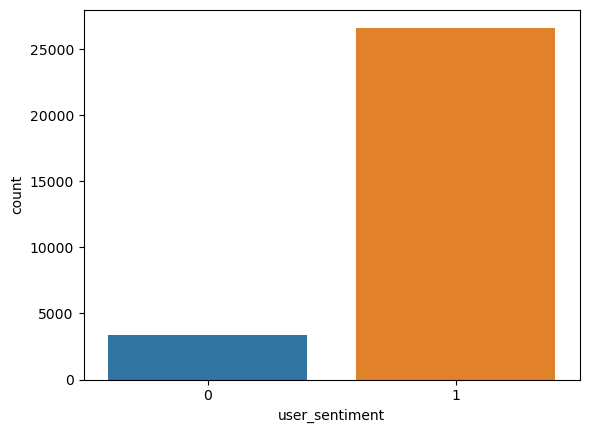

In [13]:
#Visualize using count plot
sns.countplot(x='user_sentiment', data= df)

##### From the above plot, almost 90% of total reviews are positive. we may have to do Class Imbalance techniques during modelling.

In [14]:
df["reviews_rating"].value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

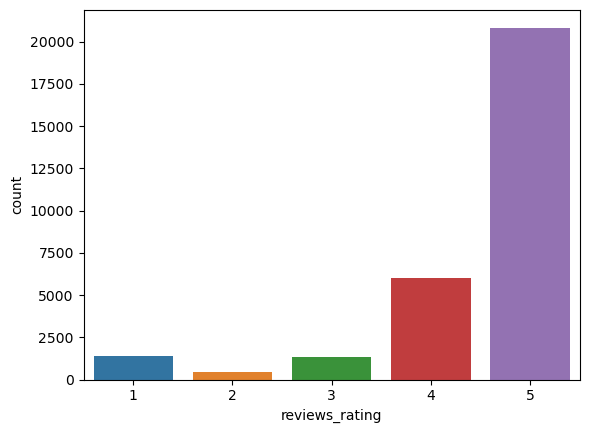

In [15]:
#visualize the reviews_rating
sns.countplot(x='reviews_rating', data= df)

In [16]:
df[(df["user_sentiment"]==1) & (df["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]].head(5)

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,1
11,Waste of Money,Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.,1
14,Disappointed,First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.,1
18,Pretty nice,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3
54,New formula is terrible,"I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.",1


In [17]:
df[(df["user_sentiment"]==0) & (df["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]].head(5)

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,4
96,This product has made a real difference on my skin,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,4
106,Very rich cream,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",4
117,Not greasy,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",4


In [18]:
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


##### Looking at the outcome of the last 3 cells,its quite evident that there is mismtach between review_rating and user_sentiment. There are records that have higher user rating but user sentiment is negative and there are lower user rating but user sentiment is positive. Instead of cleaning up such records updating the user_sentiment to 0 (which was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(which was 0), when the reviews_rating is greater than or equal to 4.

In [19]:
df.loc[(df["user_sentiment"]==1) & (df["reviews_rating"]<4), "user_sentiment"] = 0

In [20]:
df.loc[(df["user_sentiment"]==0) & (df["reviews_rating"]>=4), "user_sentiment"] = 1

In [21]:
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


##### Above results show we are able to address the mismatch between the reviews_rating and user_sentiment

In [22]:
df["brand"].value_counts()

Clorox                   10585
Warner Home Video         3325
Disney                    1199
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: brand, Length: 214, dtype: int64

<AxesSubplot:xlabel='brand'>

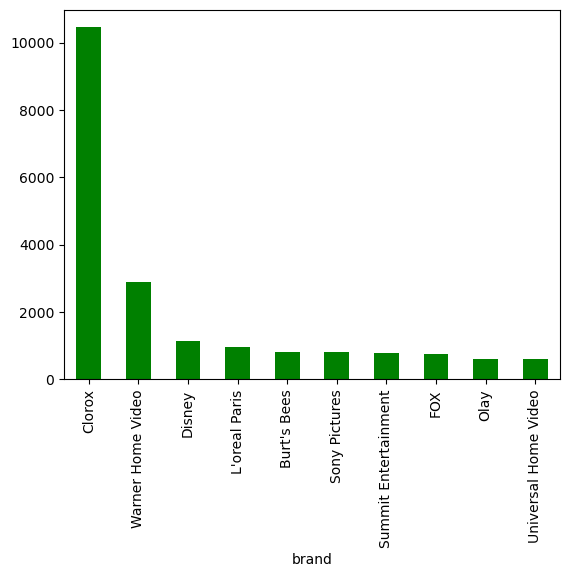

In [23]:
# Filter the top 10 brands among the positive sentiments
df[df['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='g')


<AxesSubplot:xlabel='brand'>

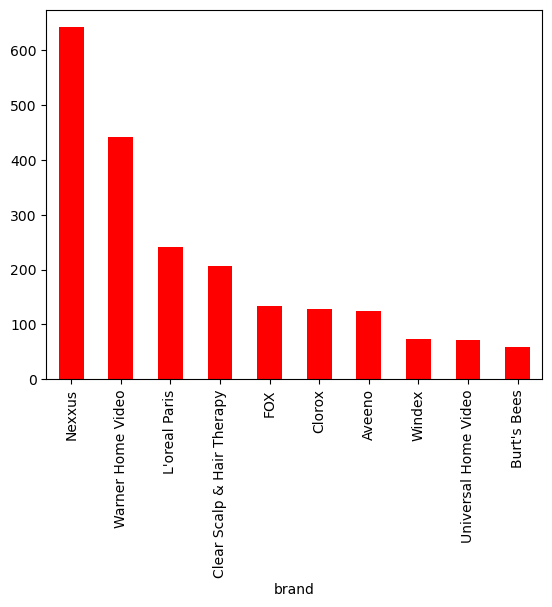

In [24]:
# Filter the top 10 brands among the negative sentiments
df[df['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')


In [25]:
#Let's find out the most common manufacture.
df["manufacturer"].value_counts()[:10]

Clorox                    8546
Test                      3325
AmazonUs/CLOO7            2039
L'oreal Paris             1232
Walt Disney               1142
Burt's Bees                873
SONY CORP                  845
Twentieth Century Fox      757
P&G                        730
Nexxus Beauty Products     693
Name: manufacturer, dtype: int64

In [26]:
#Let's find out the most common users.
df["reviews_username"].value_counts()[:10]

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
Name: reviews_username, dtype: int64

In [27]:
df.reviews_username.isnull().sum()

63

In [28]:
df.shape

(29999, 15)

In [29]:
#removing nan/null from username
df = df[~df.reviews_username.isnull()]

In [30]:
df.shape

(29936, 15)

In [31]:
df[['id','reviews_title','reviews_text','user_sentiment']].head()

,id,reviews_title,reviews_text,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1
1,AV14LG0R-jtxr-f38QfS,Good,Good flavor. This review was collected as part of a promotion.,1
2,AV14LG0R-jtxr-f38QfS,Good,Good flavor.,1
3,AV16khLE-jtxr-f38VFn,Disappointed,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",0
4,AV16khLE-jtxr-f38VFn,Irritation,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0


In [32]:
df_clean = df.copy()

In [33]:
df_clean.shape

(29936, 15)

In [34]:
missing_values_percentage(df_clean)

                      Percentage  Count
reviews_userProvince       99.45  29770
reviews_userCity           93.65  28036
reviews_didPurchase        46.78  14005
reviews_doRecommend         8.49   2541
reviews_title               0.63    189
manufacturer                0.47    141
reviews_date                0.13     40


In [35]:
df_clean["reviews_title"] = df_clean["reviews_title"].fillna('')

In [36]:
# Concatenating reviews_text and reviews_title into a single column
df_clean["reviews_full_text"] = df_clean[['reviews_text','reviews_title']].agg('. '.join, axis=1).str.lstrip('. ')

In [37]:
df_clean[['id','reviews_title','reviews_text','reviews_full_text']].head()

,id,reviews_title,reviews_text,reviews_full_text
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.. Just Awesome
1,AV14LG0R-jtxr-f38QfS,Good,Good flavor. This review was collected as part of a promotion.,Good flavor. This review was collected as part of a promotion.. Good
2,AV14LG0R-jtxr-f38QfS,Good,Good flavor.,Good flavor.. Good
3,AV16khLE-jtxr-f38VFn,Disappointed,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...","I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ..."
4,AV16khLE-jtxr-f38VFn,Irritation,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.. Irritation


In [38]:
df_clean.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
reviews_full_text           0
dtype: int64

##### We will go ahead with id,name,reviews_full_text and user_sentiment columns going forward. And there is no any null/na values.

In [39]:
# Creating df_final with only the required columns.
df_final = df_clean[['id','name', 'reviews_full_text', 'user_sentiment']]

In [40]:
df_final.shape

(29936, 4)

### Text Preprocessing for Modelling:

In [41]:
df_final.head(3)

,id,name,reviews_full_text,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.. Just Awesome,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion.. Good,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.. Good,1


#### Handling punctuations:

In [42]:
# Function to clean the text and remove all the unnecessary elements.
def clean_punctuation(text):
    text = text.lower() # Text to lowercase
    pattern = '[^\w\s]' # Removing punctuation
    text = re.sub(pattern, '', text)
    return text

In [43]:
df_final['reviews_cleaned'] = df_final['reviews_full_text'].apply(clean_punctuation)

In [44]:
df_final.head(3)

,id,name,reviews_full_text,user_sentiment,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.. Just Awesome,1,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy just awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion.. Good,1,good flavor this review was collected as part of a promotion good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.. Good,1,good flavor good


#### Handling stopwords:

In [45]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
print(stopwords)

{'them', 'some', 'our', 'been', 'out', 'yourselves', "isn't", 'what', 'of', 'couldn', 'o', 'will', "aren't", 'yourself', 'don', 've', 'these', 'wouldn', 'below', 'each', 'isn', 'has', 'while', 'off', 'not', 'll', 'most', "don't", 'through', 'me', "that'll", 'during', "wouldn't", 'now', 'from', 'mustn', 'doesn', 'his', 'so', 'itself', 'your', 'have', 'to', 'didn', "shan't", 'they', 'on', 'the', 'those', 'am', 'which', "needn't", "weren't", 'their', 'won', 'few', 'only', 'until', 'down', "you'd", 'in', "hadn't", 'then', 'it', 'her', 'against', 'him', 'between', 'before', 'm', 'y', 'wasn', 'as', 'we', 'both', 'myself', 'you', 'weren', 'why', 'about', 'herself', 'where', 'for', 'haven', 'just', "she's", 'further', 'same', 'can', 'ain', 'was', "couldn't", 'or', 'up', 'hers', 'a', 'if', 'more', 'my', 'ourselves', "you've", 'he', 'above', 'than', 'and', 'no', "doesn't", 'doing', 'mightn', 'i', 'should', 'be', 'yours', 'does', 'here', "didn't", 'this', 'because', 'over', 'all', 're', 'other', 

In [46]:
# Function to remove the stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [47]:
df_final['reviews_cleaned'] = df_final['reviews_cleaned'].apply(remove_stopword)

In [48]:
df_final.head(3)

,id,name,reviews_full_text,user_sentiment,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.. Just Awesome,1,love album good hip hop side current pop sound hype listen everyday gym give rating way metaphors crazy awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion.. Good,1,good flavor review collected part promotion good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.. Good,1,good flavor good


#### Handling lemmatization:

In [49]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [50]:
lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [51]:
df_final['reviews_cleaned'] = df_final['reviews_cleaned'].apply(lemma_text)

In [52]:
df_final.head(3)

,id,name,reviews_full_text,user_sentiment,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.. Just Awesome,1,love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion.. Good,1,good flavor review collect part promotion good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.. Good,1,good flavor good


In [53]:
df_final = df_final[['id','name','reviews_cleaned', 'user_sentiment']]

In [54]:
df_final.head(3)

,id,name,reviews_cleaned,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy awesome,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor review collect part promotion good,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor good,1


In [55]:
df_final.shape

(29936, 4)

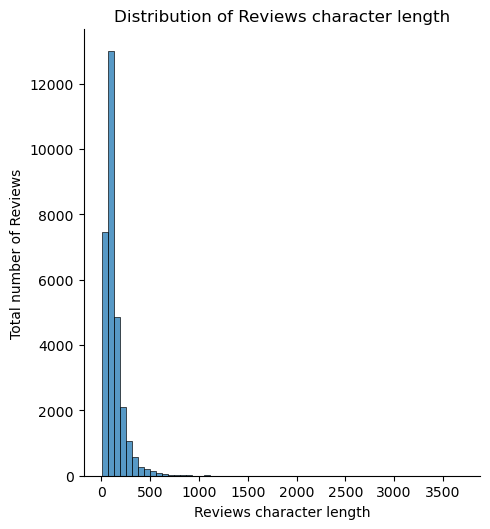

In [56]:
# Visualizing 'reviews_lemmatized' character length
character_length = [len(each_sent) for each_sent in df_final['reviews_cleaned']]

sns.displot(character_length, kind='hist', bins=60)
plt.xlabel("Reviews character length")
plt.ylabel("Total number of Reviews")
plt.title("Distribution of Reviews character length")
plt.show()

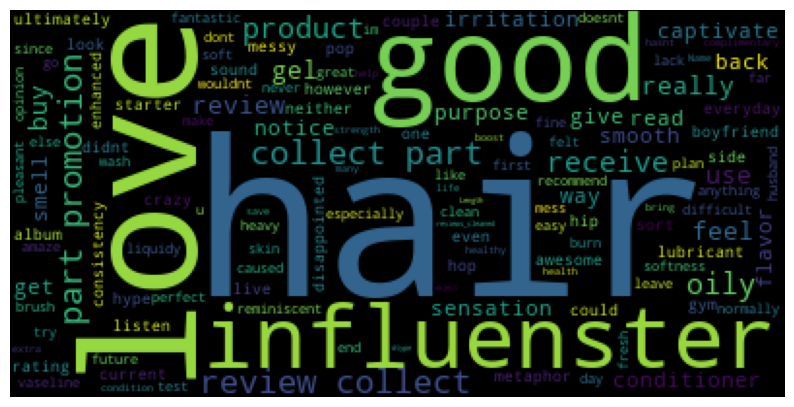

In [57]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df_final.reviews_cleaned))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [58]:
def getMostCommonWords(reviews, n_most_common):
    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in review.lower().split()]


    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]


    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [59]:
import string
pos_reviews = df_final[df_final['user_sentiment']==1]
getMostCommonWords(pos_reviews['reviews_cleaned'],10)

[('great', 14395),
 ('love', 12413),
 ('use', 11740),
 ('product', 10805),
 ('movie', 9855),
 ('review', 8882),
 ('part', 8728),
 ('promotion', 8374),
 ('wipe', 8215),
 ('collect', 7945)]

In [60]:
neg_reviews = df_final[df_final['user_sentiment']==0]
getMostCommonWords(neg_reviews['reviews_cleaned'],10)

[('product', 1934),
 ('use', 1803),
 ('hair', 1575),
 ('formula', 1440),
 ('new', 1261),
 ('like', 1085),
 ('old', 1078),
 ('good', 1072),
 ('movie', 1033),
 ('gel', 876)]

In [61]:
#function to collect the n-gram frequency of words
def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    print("--1",sum_words)
    for word, idx in vec.vocabulary_.items():
        break
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [62]:
#Print the top 10 words in the bigram frequency
common_words = get_top_n_ngram(pos_reviews['reviews_cleaned'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


,0,1
0,review collect,7921
1,collect promotion,7921
2,clorox wipe,2805
3,great product,1903
4,great movie,1725
5,easy use,1543
6,promotion great,1306
7,love clorox,1203
8,love product,1114
9,promotion love,1100


--1 [[1 1 1 ... 1 1 2]]


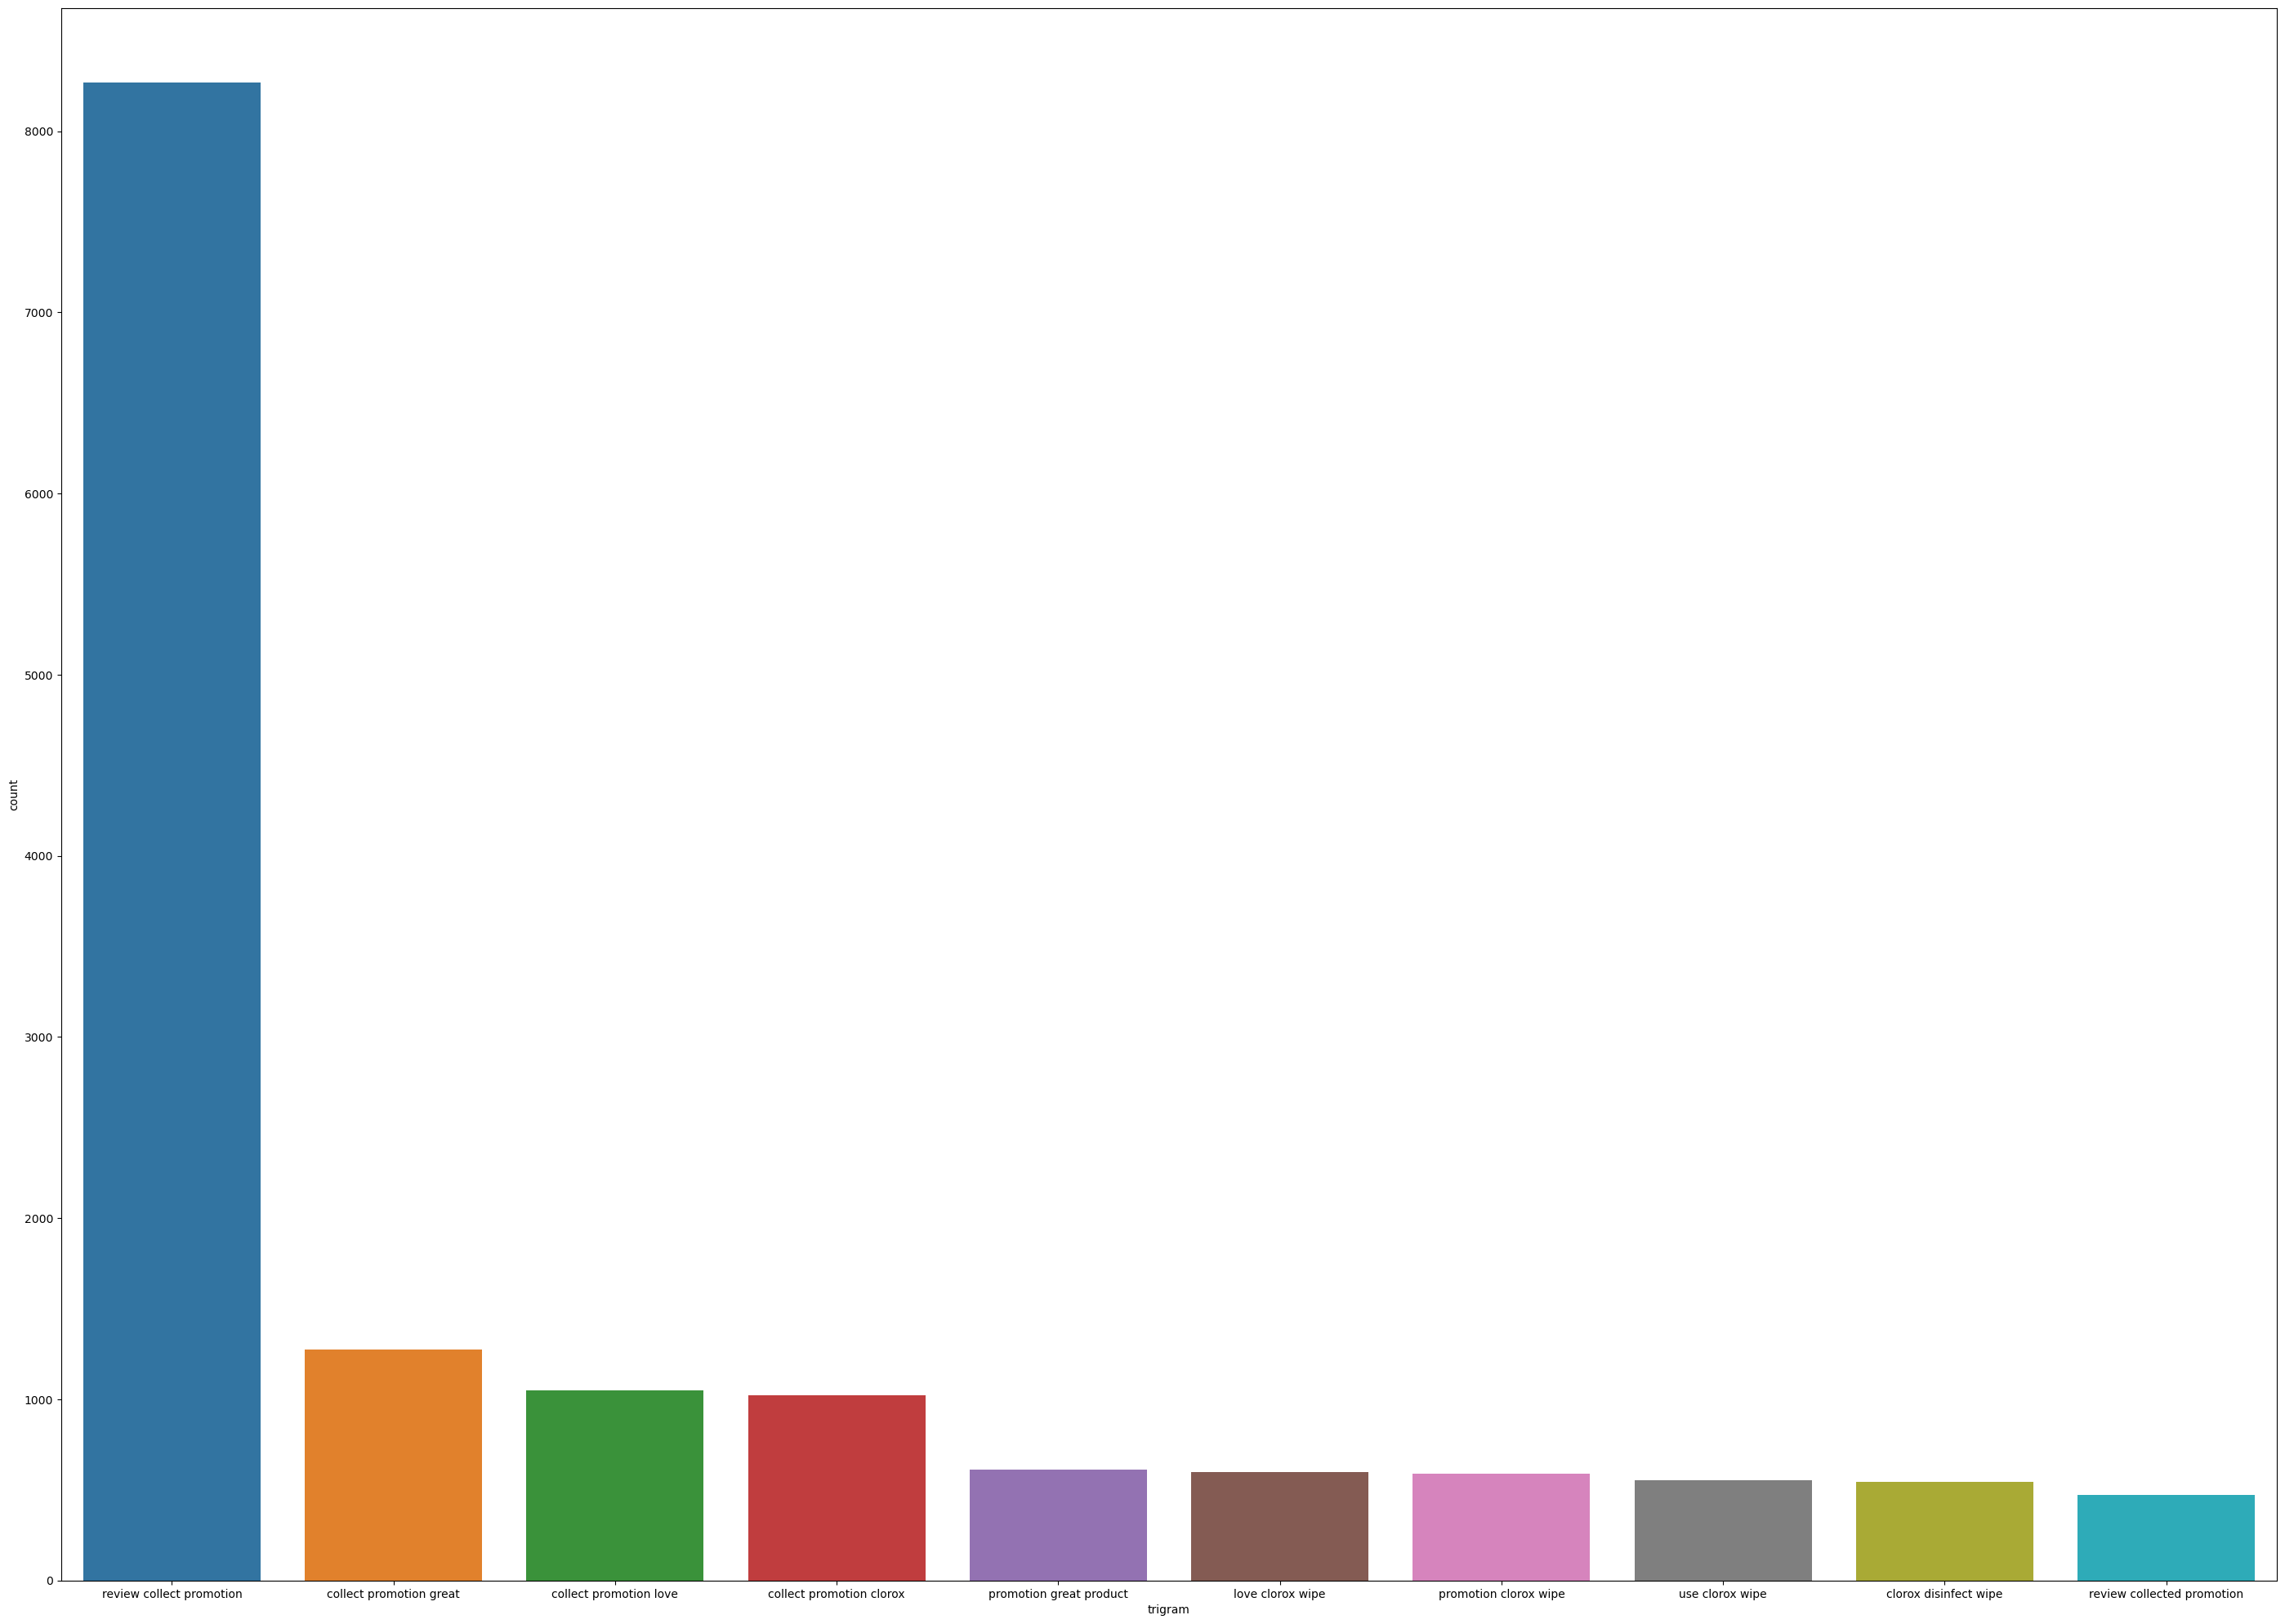

In [63]:
#logic to find the top 10 trigram frequency among the reviews_text in the cleaned datafram(df_clean). 
common_words = get_top_n_ngram(df_final.reviews_cleaned, 3, 10)
df3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
plt.figure(figsize=[35,25])
fig = sns.barplot(x=df3['trigram'], y=df3['count'])

### TF-IDF Feature Extraction:

In [64]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english', binary=True,ngram_range=(1,2))
X = tfidf.fit_transform(df_final['reviews_cleaned'])
y= df_final['user_sentiment']

#### Train, Test split:

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [66]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (22452, 16269) (22452,)
Test shapes: (7484, 16269) (7484,)


#### Class Imbalance:

In [67]:
# Check the data to see if there is a class imbalance in the data
df_final['user_sentiment'].value_counts(normalize=True)

1    0.9
0    0.1
Name: user_sentiment, dtype: float64

In [68]:
counter = Counter(y_train)
print("Before handling imbalance", counter)

#oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After handling imbalance", counter)

Before handling imbalance Counter({1: 20087, 0: 2365})
After handling imbalance Counter({1: 20087, 0: 20087})


### Model Building:

In [69]:
import time
from sklearn import metrics
import pickle

In [70]:
def evaluation_scores(model, X_test, y_test):
    result_metrics = []
    # Calculating Predicted value
    y_pred = model.predict(X_test)
    
    # Calculating Model Performance Metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    print("*"*30)
    print(f"Accuracy is : {accuracy*100:.1f}%")
    print(f"Precision is : {precision*100:.1f}%")
    print(f"Recall is : {recall*100:.1f}%")
    print(f"F1 Score is : {f1score*100:.1f}%")
    print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
    print("*"*30)
    print("\n")
    print(metrics.classification_report(y_test, y_pred))
    result_metrics.append(accuracy)
    result_metrics.append(precision)
    result_metrics.append(recall)
    result_metrics.append(f1score)
    result_metrics.append(roc_auc)
    
    # Create confusion matrix
    conf_m = confusion_matrix(y_test, y_pred)
    print("Visualizing the Confusion Matrix with a Heatmap")
    print("\n")
    print("*"*50)
    # Visualize Confusion Matrix with heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                  annot=True,
                  cbar=False,
                  cmap="Blues", fmt = '0.2f')
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")
    plt.show()
    print("*"*50)
    print("\n")
    
    # Displaying ROC Curve:
    metrics.plot_roc_curve(model, X_test, y_test)
    
    return result_metrics

### Logistic Regression:

In [71]:
lr_model = LogisticRegression(random_state=42, max_iter=100, solver='liblinear', class_weight="balanced").fit(X_train_sm, y_train_sm)

******************************
Accuracy is : 91.5%
Precision is : 97.1%
Recall is : 93.3%
F1 Score is : 95.2%
Roc-Auc Score is:93.1%
******************************


              precision    recall  f1-score   support

           0       0.56      0.76      0.65       770
           1       0.97      0.93      0.95      6714

    accuracy                           0.91      7484
   macro avg       0.77      0.84      0.80      7484
weighted avg       0.93      0.91      0.92      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


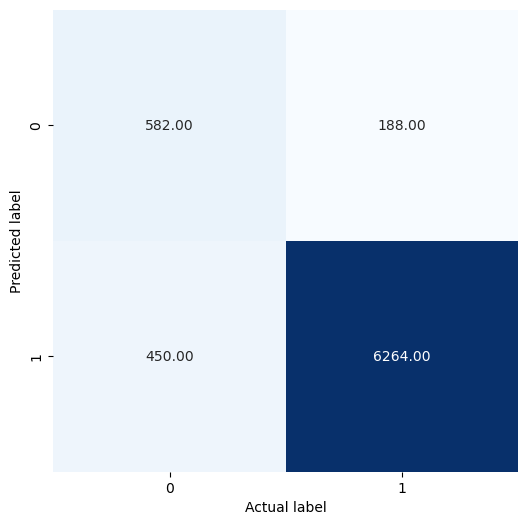

**************************************************




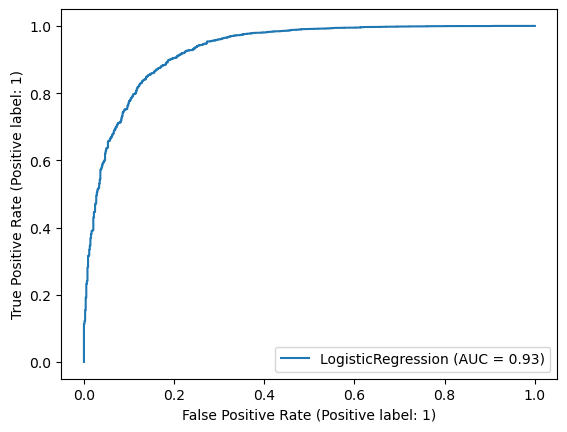

In [72]:
# Getting the score of the base model
lr_metrics = evaluation_scores(lr_model, X_test, y_test)

#### HyperParameter Tuning:

In [73]:
logreg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}

In [74]:
# Setup grid hyperparameter search for LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
logreg_hpt = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=logreg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
logreg_hpt.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [75]:
# Checking the best parameters
logreg_hpt.best_params_

{'C': 100, 'solver': 'liblinear'}

#### HyperParameter Tuned Model:

******************************
Accuracy is : 92.3%
Precision is : 96.3%
Recall is : 95.1%
F1 Score is : 95.7%
Roc-Auc Score is:90.6%
******************************


              precision    recall  f1-score   support

           0       0.61      0.68      0.64       770
           1       0.96      0.95      0.96      6714

    accuracy                           0.92      7484
   macro avg       0.79      0.81      0.80      7484
weighted avg       0.93      0.92      0.92      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


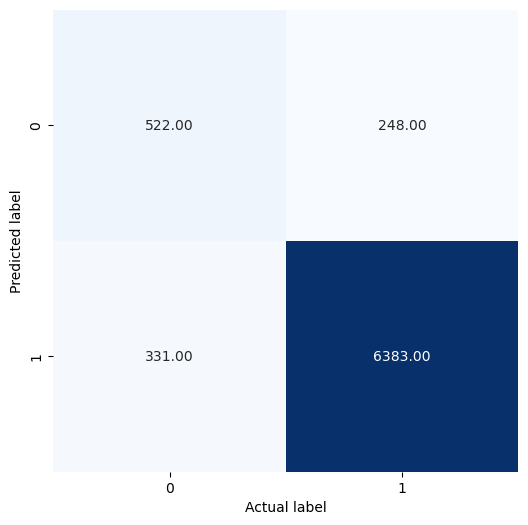

**************************************************




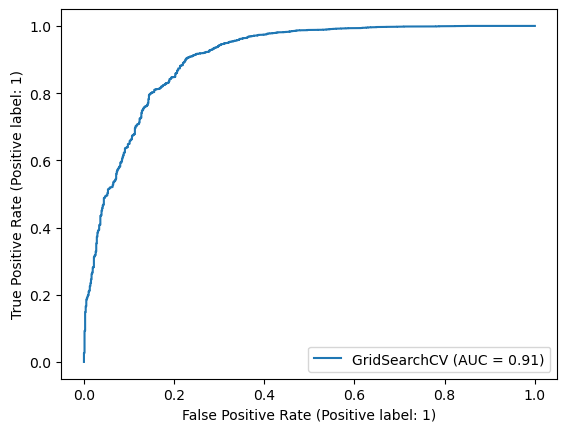

In [76]:
# Getting the score of the hp model
lr_hp_metrics = evaluation_scores(logreg_hpt, X_test, y_test)

### Naive Bayes:

In [77]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB

In [78]:
mnb_model = MultinomialNB(alpha=1.0).fit(X_train_sm, y_train_sm)

******************************
Accuracy is : 87.5%
Precision is : 97.6%
Recall is : 88.2%
F1 Score is : 92.7%
Roc-Auc Score is:92.4%
******************************


              precision    recall  f1-score   support

           0       0.44      0.81      0.57       770
           1       0.98      0.88      0.93      6714

    accuracy                           0.87      7484
   macro avg       0.71      0.85      0.75      7484
weighted avg       0.92      0.87      0.89      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


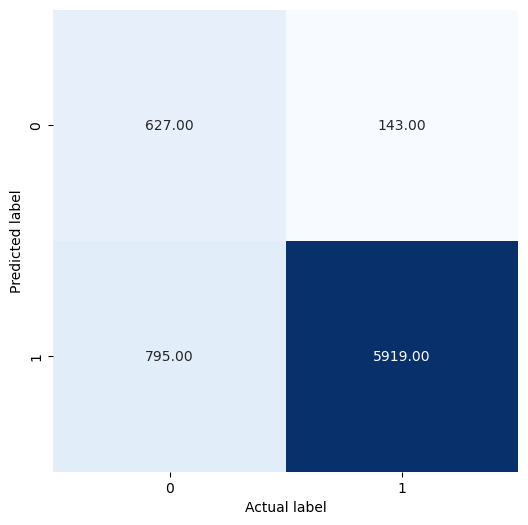

**************************************************




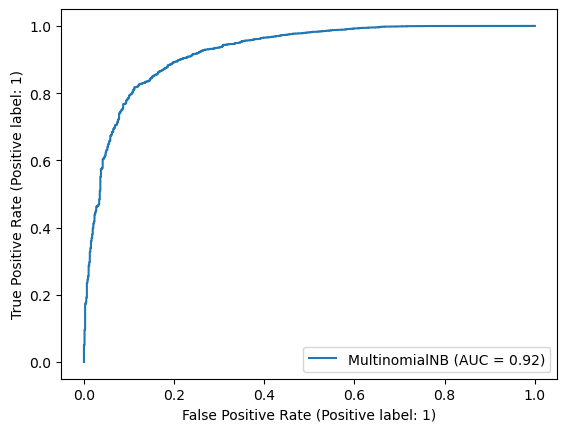

In [79]:
# Getting the score of the base model
mnb_metrics = evaluation_scores(mnb_model, X_test, y_test)

### Decision Tree:

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_model = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10).fit(X_train_sm, y_train_sm)

******************************
Accuracy is : 72.4%
Precision is : 97.2%
Recall is : 71.3%
F1 Score is : 82.3%
Roc-Auc Score is:81.9%
******************************


              precision    recall  f1-score   support

           0       0.25      0.82      0.38       770
           1       0.97      0.71      0.82      6714

    accuracy                           0.72      7484
   macro avg       0.61      0.77      0.60      7484
weighted avg       0.90      0.72      0.78      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


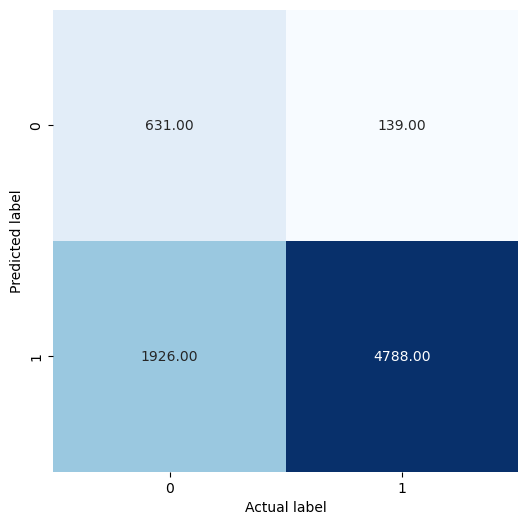

**************************************************




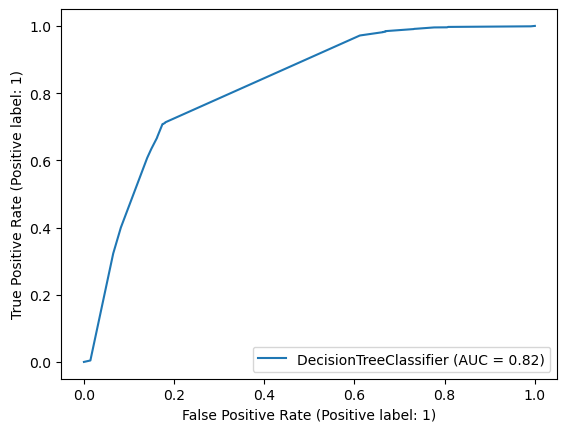

In [82]:
# Getting the score of the base model
dt_metrics = evaluation_scores(dt_model, X_test, y_test)

### Random Forrest:

In [83]:
rf_model = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini").fit(X_train_sm, y_train_sm)

******************************
Accuracy is : 92.6%
Precision is : 95.2%
Recall is : 96.6%
F1 Score is : 95.9%
Roc-Auc Score is:91.5%
******************************


              precision    recall  f1-score   support

           0       0.66      0.58      0.62       770
           1       0.95      0.97      0.96      6714

    accuracy                           0.93      7484
   macro avg       0.81      0.77      0.79      7484
weighted avg       0.92      0.93      0.92      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


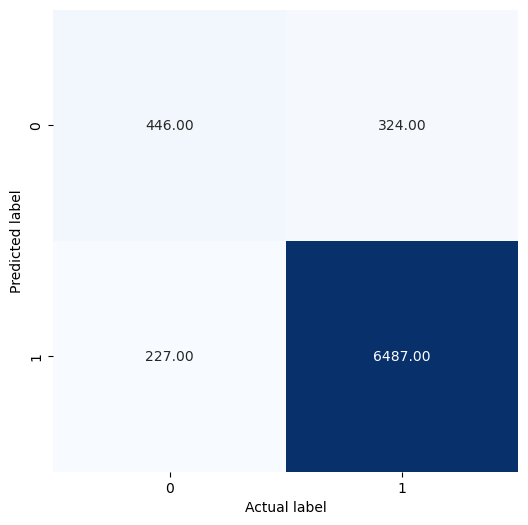

**************************************************




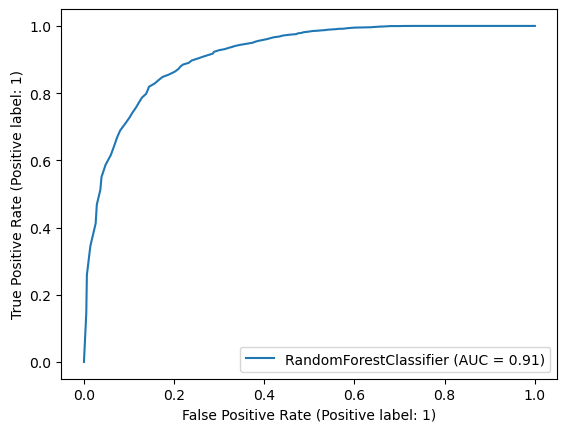

In [84]:
# Getting the score of the base model
rf_metrics = evaluation_scores(rf_model, X_test, y_test)

#### HyperParameter Tuning:

In [85]:
rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")

In [86]:
rf_grid = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [87]:
rf_hpt = GridSearchCV(estimator=rf,
                           param_grid=rf_grid,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="f1")

# Fit random hyperparameter search model
rf_hpt.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [88]:
# Check best parameters
rf_hpt.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}

#### HyperParameter Tuned Model:

******************************
Accuracy is : 87.9%
Precision is : 95.1%
Recall is : 91.3%
F1 Score is : 93.1%
Roc-Auc Score is:87.4%
******************************


              precision    recall  f1-score   support

           0       0.44      0.59      0.50       770
           1       0.95      0.91      0.93      6714

    accuracy                           0.88      7484
   macro avg       0.69      0.75      0.72      7484
weighted avg       0.90      0.88      0.89      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


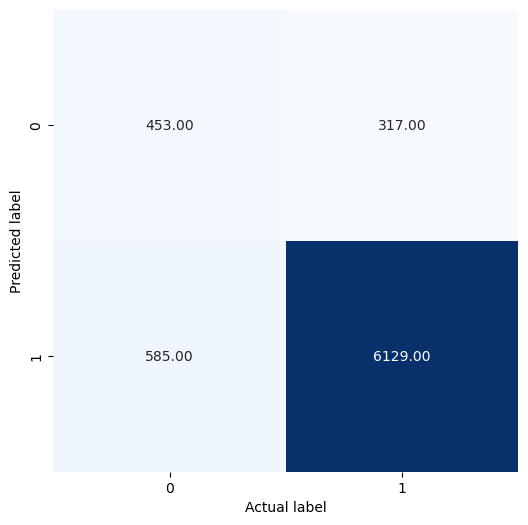

**************************************************




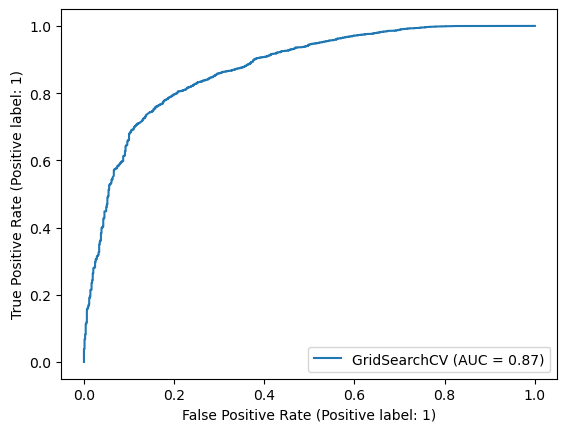

In [89]:
# Getting the score of the hp model
rf_hp_metrics = evaluation_scores(rf_hpt, X_test, y_test)

### XGBoost Classifier:

In [90]:
import xgboost as xgb

In [91]:
xgb_model = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42).fit(X_train_sm, y_train_sm)

******************************
Accuracy is : 92.6%
Precision is : 95.3%
Recall is : 96.5%
F1 Score is : 95.9%
Roc-Auc Score is:91.1%
******************************


              precision    recall  f1-score   support

           0       0.66      0.58      0.62       770
           1       0.95      0.97      0.96      6714

    accuracy                           0.93      7484
   macro avg       0.80      0.77      0.79      7484
weighted avg       0.92      0.93      0.92      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


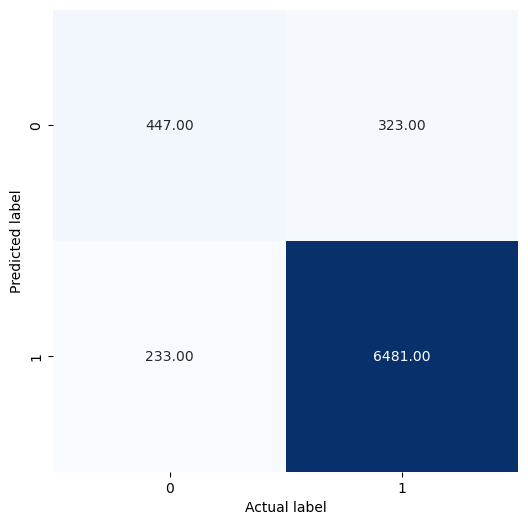

**************************************************




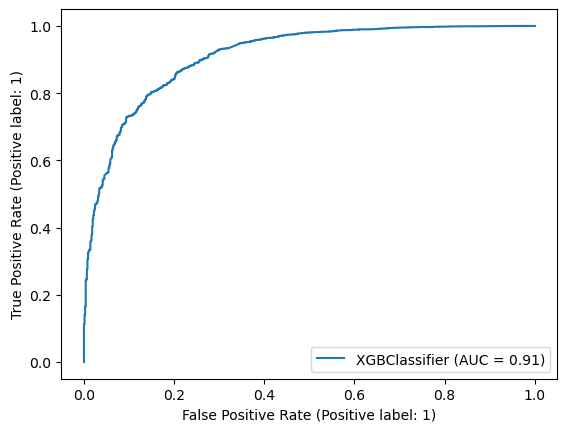

In [92]:
# Getting the score of the base model
xgb_metrics = evaluation_scores(xgb_model, X_test, y_test)

#### HyperParameter Tuning:

In [93]:
xg_grid = {"learning_rate": np.arange(0.1, 1, 0.2),
           "max_depth": np.arange(5, 20, 5)
           }

In [94]:
# Setup random hyperparameter search for Random Forest Classifier
xg_hpt = RandomizedSearchCV(xgb.XGBClassifier(random_state=42),
                                param_distributions=xg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
xg_hpt.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [95]:
# Check best parameters
xg_hpt.best_params_

{'max_depth': 15, 'learning_rate': 0.5000000000000001}

#### HyperParameter Tuned Model:

******************************
Accuracy is : 93.3%
Precision is : 95.4%
Recall is : 97.2%
F1 Score is : 96.3%
Roc-Auc Score is:91.1%
******************************


              precision    recall  f1-score   support

           0       0.71      0.59      0.65       770
           1       0.95      0.97      0.96      6714

    accuracy                           0.93      7484
   macro avg       0.83      0.78      0.80      7484
weighted avg       0.93      0.93      0.93      7484

Visualizing the Confusion Matrix with a Heatmap


**************************************************


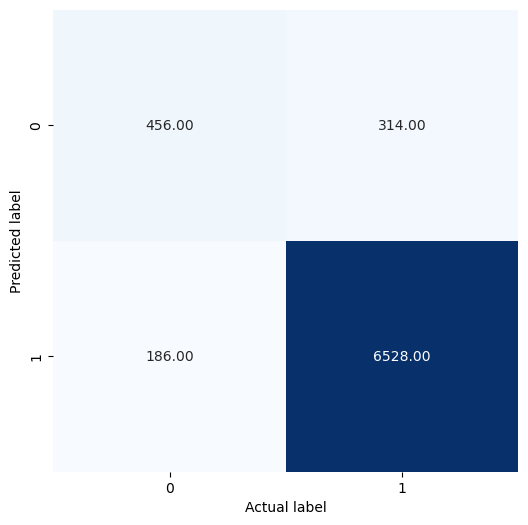

**************************************************




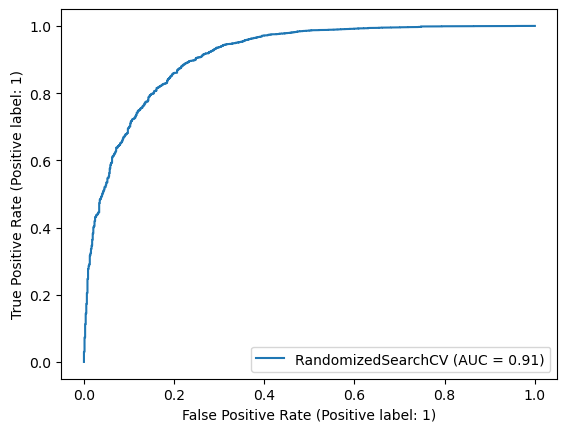

In [96]:
# Getting the score of the hpt model:
xg_hp_metrics = evaluation_scores(xg_hpt, X_test, y_test)

### Model Inference:

In [97]:
# Creating a table which contain all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': mnb_metrics,
        'Decision Tree': dt_metrics,
        'Random Forrest': rf_metrics,
        'XG Boost': xgb_metrics,
        'Logistic Regression Hpt':lr_hp_metrics,
        'Random Forrest Hpt':rf_hp_metrics,
        'XG Boost Hpt':xg_hp_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forrest',
                                                    'XG Boost','Logistic Regression Hpt','Random Forrest Hpt','XG Boost Hpt'] )

df_metrics

,Metric,Logistic Regression,Naive Bayes,Decision Tree,Random Forrest,XG Boost,Logistic Regression Hpt,Random Forrest Hpt,XG Boost Hpt
0,Accuracy,0.91,0.87,0.72,0.93,0.93,0.92,0.88,0.93
1,Precision,0.97,0.98,0.97,0.95,0.95,0.96,0.95,0.95
2,Recall,0.93,0.88,0.71,0.97,0.97,0.95,0.91,0.97
3,F1Score,0.95,0.93,0.82,0.96,0.96,0.96,0.93,0.96
4,Auc Score,0.93,0.92,0.82,0.91,0.91,0.91,0.87,0.91


#### Comparing the above models on the metrics, XG Boost looks to be a better model, saving the XG Boost model as a pickle file for later use.

In [98]:
xgclf = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42)

### Saving the model:

In [99]:
filename = "pickle_"+"sentiment-classification-xg-boost-model"+'.pkl'

In [100]:
pickle.dump(xgclf, open(filename, 'wb'))

In [101]:
filename = "pickle_"+"tfidf-vectorizer"+'.pkl'

In [102]:
pickle.dump(tfidf, open(filename, 'wb'))

In [103]:
filename = "pickle_"+"cleaned-data"+'.pkl'

In [104]:
pickle.dump(df_final, open(filename, 'wb'))

## Recommendation System:

In [105]:
df_reco = df[["id", "name", "reviews_rating", "reviews_username"]]

In [106]:
df_reco.shape

(29936, 4)

In [107]:
df_reco.head(2)

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w


In [108]:
# Checking if there is any column with null values
df_reco.isna().any()

id                  False
name                False
reviews_rating      False
reviews_username    False
dtype: bool

In [109]:
#splitting the train and test
train, test = train_test_split(df_reco, test_size=0.25, random_state=42)

In [110]:
print(train.shape)
print(test.shape)

(22452, 4)
(7484, 4)


In [111]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
df_pivot = pd.pivot_table(train,index='reviews_username', columns = 'id', values = 'reviews_rating').fillna(0)
df_pivot.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train and test:

In [112]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [113]:
dummy_train.head(3)

,id,name,reviews_rating,reviews_username
27954,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,silvahalo
3375,AVpe5s3RLJeJML43x4eA,Pantene Pro-V Expert Collection Age Defy Conditioner,4,stacberg
20192,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,erwerw


In [114]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [115]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
dummy_train = pd.pivot_table(dummy_train,index='reviews_username', columns = 'id', values = 'reviews_rating').fillna(1)
dummy_train.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User Similarity Matrix:

In [116]:
df_pivot.index.nunique()

19427

In [117]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

In [118]:
#using cosine_similarity function to compute the distance.
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]
(19427, 19427)


### Prediction User-User:

In [119]:
#filtering out the user_correlation that are negatively correlated
user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [120]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 1.20913332, ..., 2.9103958 , 0.        ,
        0.54410719],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 1.64034869, 0.        ,
        0.57353933],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [121]:
# since we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,1.21,13.58,0.0,0.0,0.0,2.26,0.44,3.14,0.0,0.0,0.0,0.0,0.0,3.94,1.02,0.00,0.00,0.0,2.34,0.0,2.32,0.00,0.0,...,2.54,3.96,0.0,0.0,1.49,0.0,0.0,0.0,3.14,7.40,0.76,3.35,0.0,0.0,2.37,0.45,0.42,0.00,0.0,0.0,0.0,2.12,2.91,0.0,0.54
01impala,0.0,0.0,3.12,15.58,0.0,0.0,0.0,0.00,2.34,2.12,0.0,0.0,0.0,0.0,0.0,1.30,0.00,5.32,0.00,0.0,0.00,0.0,0.00,3.54,0.0,...,0.00,3.38,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.06,4.04,6.98,0.0,0.0,3.46,1.42,0.27,0.00,0.0,0.0,0.0,0.00,3.00,0.0,0.00
02dakota,0.0,0.0,3.12,15.58,0.0,0.0,0.0,0.00,2.34,2.12,0.0,0.0,0.0,0.0,0.0,1.30,0.00,5.32,0.00,0.0,0.00,0.0,0.00,3.54,0.0,...,0.00,3.38,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.06,4.04,6.98,0.0,0.0,3.46,1.42,0.27,0.00,0.0,0.0,0.0,0.00,3.00,0.0,0.00
02deuce,0.0,0.0,3.12,15.58,0.0,0.0,0.0,0.00,2.34,2.12,0.0,0.0,0.0,0.0,0.0,1.30,0.00,5.32,0.00,0.0,0.00,0.0,0.00,3.54,0.0,...,0.00,3.38,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.06,4.04,6.98,0.0,0.0,3.46,1.42,0.27,0.00,0.0,0.0,0.0,0.00,3.00,0.0,0.00
0325home,0.0,0.0,0.00,11.34,0.0,0.0,0.0,6.01,6.94,2.10,0.0,0.0,0.0,0.0,2.5,1.47,1.68,0.00,0.68,0.0,0.00,0.0,0.00,9.57,0.0,...,2.24,9.93,0.0,0.0,0.00,0.0,0.0,0.0,0.00,4.41,0.00,6.52,0.0,0.0,0.00,0.00,0.45,3.54,0.0,0.0,0.0,2.24,0.00,0.0,2.89


### Finding the Top 20 products that a user is most likely to purchase based on the ratings (user-user based recommendation):

In [122]:
user_input = "02dakota"

In [123]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

id
AVpfRTh1ilAPnD_xYic2    141.06
AVpf0eb2LJeJML43EVSt    110.42
AVpe41TqilAPnD_xQH3d     90.15
AVpf2tw1ilAPnD_xjflC     73.27
AVpe59io1cnluZ0-ZgDU     58.95
AVpf3VOfilAPnD_xjpun     44.76
AVpfPnrU1cnluZ0-g9rL     29.27
AVpf0thK1cnluZ0-r8vR     24.41
AVpfM_ytilAPnD_xXIJb     23.70
AVpfJP1C1cnluZ0-e3Xy     23.22
AVpe31o71cnluZ0-YrSD     20.75
AVpfR5m0LJeJML436K3W     20.13
AVpf5olc1cnluZ0-tPrO     19.63
AV1YGDqsGV-KLJ3adc-O     15.58
AVpfOIrkilAPnD_xXgDG     15.57
AVpe9W4D1cnluZ0-avf0     15.27
AVpfBrUZilAPnD_xTUly     13.17
AVpf--o9LJeJML43G_Fq     12.84
AVpf385g1cnluZ0-s0_t     12.78
AVpfazX31cnluZ0-kbdl     11.78
Name: 02dakota, dtype: float64

In [124]:
#display the top 20 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),141.06
851,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),110.42
1488,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),90.15
2061,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),73.27
2580,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),58.95
3074,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,44.76
9448,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),29.27
9586,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),24.41
9684,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,23.70
9880,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,23.22


### Evaluation User-User:

In [125]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1795, 4)

In [126]:
common.head(3)

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
22577,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,4,at527
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318


In [127]:
# convert into the user-rating matrix.
common_user_based_matrix = pd.pivot_table(common,index='reviews_username', columns = 'id', values = 'reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,19402,19403,19404,19405,19406,19407,19408,19409,19410,19411,19412,19413,19414,19415,19416,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.0,0.0,0.0,0.21,0.0,0.0,0.0,0.95,0.32,0.0,0.0,0.0,0.0,0.32,0.0,...,0.0,0.0,0.32,0.0,0.95,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.53,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.53,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.53,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00,1.0,1.0,0.0,0.00,0.00,0.0,1.0,1.0,0.0,0.00,1.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,1.0


In [129]:
user_correlation_df['reviews_username'] = df_pivot.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,19402,19403,19404,19405,19406,19407,19408,19409,19410,19411,19412,19413,19414,19415,19416,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.0,0.0,0.0,0.21,0.0,0.0,0.0,0.95,0.32,0.0,0.0,0.0,0.0,0.32,0.0,...,0.0,0.0,0.32,0.0,0.95,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.0
01impala,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.53,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
02dakota,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.53,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
02deuce,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.53,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00,1.0,1.0,0.0,0.00,0.00,0.0,1.0,1.0,0.0,0.00,1.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,1.0


In [130]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [131]:
user_correlation_df_1.shape

(1530, 19427)

In [132]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [133]:
user_correlation_df_3 = user_correlation_df_2.T

In [134]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 7.79183531, 0.        , ..., 0.        , 0.        ,
        2.29277852],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.31227896, 0.        , ..., 0.        , 0.        ,
        1.49255579],
       ...,
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.86700847, 0.        , ..., 0.        , 0.        ,
        1.74077656],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ]])

In [135]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index='reviews_username', columns = 'id', values = 'reviews_rating').fillna(0)

In [136]:
dummy_test.shape

(1530, 129)

In [137]:
common_user_based_matrix.head(3)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
dummy_test.head(3)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [140]:
common_user_predicted_ratings.head(3)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [142]:
common_ = pd.pivot_table(common,index='reviews_username', columns = 'id', values = 'reviews_rating')

In [143]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [144]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.09137486961924


### Item Based Recommendation:

In [145]:
df_pivot = pd.pivot_table(train,index='id',columns='reviews_username',values='reviews_rating')

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,...,zoeyny,zombie,zombiedad80,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [147]:
df_subtracted.head(3)

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,...,zoeyny,zombie,zombiedad80,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [149]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - item-item:

In [150]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00568296, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00946238],
       [0.        , 0.        , 0.        , ..., 0.00716692, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756991]])

#### Filtering the rating only for the products not rated by the user for recommendation:

In [151]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,9.14e-03,0.0,0.0,0.0,0.00e+00,0.00e+00,5.83e-03,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,7.11e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,...,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,9.73e-03,0.00,0.00e+00,0.0,0.0,9.60e-03,0.0,0.00,0.00e+00,0.0,0.0,0.0,1.93e-02,5.68e-03,0.0,0.00e+00
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,4.56e-03,0.0,0.0,0.0,0.0,0.00e+00,6.21e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.01e-03,0.0,...,0.00e+00,2.80e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.51e-03,0.11,5.01e-03,0.0,0.0,0.00e+00,0.0,0.09,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.00e+00
02dakota,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,7.59e-03,0.0,0.0,0.0,0.0,0.00e+00,1.03e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.69e-03,0.0,...,0.00e+00,4.67e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.18e-03,0.18,8.35e-03,0.0,0.0,0.00e+00,0.0,0.15,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.00e+00
02deuce,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,6.07e-03,0.0,0.0,0.0,0.0,0.00e+00,8.28e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.35e-03,0.0,...,0.00e+00,3.74e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.35e-03,0.14,6.68e-03,0.0,0.0,0.00e+00,0.0,0.12,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.00e+00
0325home,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,1.32e-03,3.77e-03,1.80e-03,0.0,0.0,0.0,0.0,6.37e-03,2.73e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.62e-03,0.0,...,4.42e-03,1.21e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.93e-03,0.00,2.67e-03,0.0,0.0,0.00e+00,0.0,0.00,3.78e-03,0.0,0.0,0.0,5.95e-03,0.00e+00,0.0,9.46e-03


#### Finding the top 20 recommendation for the user:

In [152]:
# Take the user ID as input
user_input = '02dakota'

In [153]:
# Recommending the Top 20 products to the user.
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpfozgyilAPnD_xfe0r    0.18
AVpfrTyiLJeJML43BrSI    0.15
AVpfQtEm1cnluZ0-hUpe    0.08
AVpfkQkcLJeJML43_kEC    0.06
AVpfRTh1ilAPnD_xYic2    0.05
AVpf0thK1cnluZ0-r8vR    0.05
AVpfOmKwLJeJML435GM7    0.05
AVpf0pfrilAPnD_xi6s_    0.04
AVpe5Mv4ilAPnD_xQQyy    0.03
AVpe_5U_ilAPnD_xSrxG    0.03
AVpfbraG1cnluZ0-kqnn    0.03
AVpf4WWN1cnluZ0-s7Wj    0.03
AVpe6PCDLJeJML43yFQH    0.03
AVpfOIrkilAPnD_xXgDG    0.03
AVpfGuDrLJeJML432fDz    0.03
AVpfR5m0LJeJML436K3W    0.03
AVpe8xjUilAPnD_xRkxC    0.02
AVpfJcHuLJeJML433ZrY    0.02
AVpe41TqilAPnD_xQH3d    0.02
AVpfN6Z71cnluZ0-gZmO    0.02
Name: 02dakota, dtype: float64

In [154]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfozgyilAPnD_xfe0r,Olivella Bar Soap - 3.52 Oz,0.18
2,AVpfrTyiLJeJML43BrSI,Various Artists - Choo Choo Soul (cd),0.15
23,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.08
44,AVpfkQkcLJeJML43_kEC,Cococare 100% Natural Castor Oil,0.06
46,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),0.05
897,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.05
995,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,0.05
1275,AVpf0pfrilAPnD_xi6s_,Nearly Natural 5.5' Bamboo W/decorative Planter,0.04
1280,AVpe5Mv4ilAPnD_xQQyy,"Beanitos Bean Chips, Simply Pinto Bean",0.03
1283,AVpe_5U_ilAPnD_xSrxG,Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,0.03


### Evaluation - item-item:

In [155]:
common =  test[test.id.isin(train.id)]
common.shape

(7472, 4)

In [156]:
common.head(3)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108


In [157]:
common_item_based_matrix = common.pivot_table(index='id', columns='reviews_username', values='reviews_rating')

In [158]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,8.39e-04,0.0,0.0,0.0,...,0.0,2.38e-03,0.0,0.0,0.0,0.0,0.0,0.0,1.96e-03,2.01e-03,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
list_name = common.id.tolist()

In [161]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [162]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [163]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00756991, ..., 0.        , 0.        ,
        0.00946238]])

In [164]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index='id', columns='reviews_username', values='reviews_rating').fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [165]:
common_ = pd.pivot_table(common,index='id', columns='reviews_username', values='reviews_rating')

In [166]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [167]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [168]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5552339290499266


#### On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [169]:
# saving the correlation matrix of user based recommender
filename = "pickle_"+"user_final_rating"+'.pkl'

In [170]:
pickle.dump(user_final_rating, open(filename, 'wb'))

### Improving the recommendations using the sentiment analysis model and Recommend of Top 5 Products:

In [171]:
def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = df_final[df_final.id.isin(recommendations)]
        #transfor the input data using saved tf-idf vectorizer
        X = tfidf.transform(temp["reviews_cleaned"].values.astype(str))
        temp["predicted_sentiment"] = xgb_model.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [172]:
#testing the above fuction using one of the users that's trained on.
get_sentiment_recommendations("02dakota")

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
4,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8500,8525,99.71
3,Clorox Disinfecting Bathroom Cleaner,2039,2023,2039,99.22
13,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1142,1118,1142,97.90
15,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,180,186,96.77
16,The Resident Evil Collection 5 Discs (blu-Ray),845,815,845,96.45
14,Red (special Edition) (dvdvideo),672,645,672,95.98
0,100:Complete First Season (blu-Ray),139,133,139,95.68
9,Jason Aldean - They Don't Know,204,195,204,95.59
2,Chester's Cheese Flavored Puffcorn Snacks,177,168,177,94.92
5,"Coty Airspun Face Powder, Translucent Extra Coverage",158,148,158,93.67


In [173]:
#get the top 5
get_sentiment_recommendations("02dakota")[:5]

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
4,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8500,8525,99.71
3,Clorox Disinfecting Bathroom Cleaner,2039,2023,2039,99.22
13,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1142,1118,1142,97.90
15,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,180,186,96.77
16,The Resident Evil Collection 5 Discs (blu-Ray),845,815,845,96.45


In [174]:
#testing the above fuction on the user that doesn't exists or a new user
get_sentiment_recommendations("xyz")

User name xyz doesn't exist


### Please Note, the following Task has been descoped(from this Capstone Project through an email).
### Task 8: Deployment Using Flask and Heroku.
### Hence there wont be any file related to deployment in the final submission.